목적지 유형별 검색량에서 음식 검색량이 눈에 띄게 상승.
천안 서북구

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 파일 읽기
df = pd.read_csv('20240822000558_목적지 유형별 검색량.csv', encoding='cp949')
df.drop(index=df.index[0:5], inplace=True)

# '기준연월'을 datetime 형식으로 변환 (연도와 월을 포함하는 경우)
df['기준연월'] = pd.to_datetime(df['기준연월'], format='%Y', errors='coerce')

# '기준연월'을 오름차순으로 정렬
df = df.sort_values(by='기준연월')

# 정렬된 데이터 출력
print(df)


         기준연월 목적지 유형  목적지 검색량
14 2019-01-01   체험관광   273565
7  2019-01-01   기타관광  2074216
8  2019-01-01   문화관광  1458959
9  2019-01-01     쇼핑   751588
10 2019-01-01     숙박  1373292
11 2019-01-01     음식  3850383
12 2019-01-01   역사관광   916583
13 2019-01-01   자연관광  1917964
15 2019-01-01  레저스포츠   638433
28 2020-01-01     숙박  1662720
29 2020-01-01     음식  4642607
30 2020-01-01   역사관광   988392
31 2020-01-01   자연관광  2555643
27 2020-01-01     쇼핑   847464
33 2020-01-01  레저스포츠   753873
26 2020-01-01   문화관광  1303718
32 2020-01-01   체험관광   169107
38 2020-01-01   기타관광  2009055
34 2021-01-01   기타관광  2299875
37 2021-01-01     숙박  2132569
42 2021-01-01  레저스포츠   931543
39 2021-01-01   역사관광  1174458
40 2021-01-01   자연관광  2765968
41 2021-01-01   체험관광   161753
35 2021-01-01   문화관광  1679036
25 2021-01-01     음식  6548077
36 2021-01-01     쇼핑  1200107
43 2022-01-01   기타관광  2570364
44 2022-01-01   문화관광  2018750
45 2022-01-01     쇼핑  1348821
46 2022-01-01     숙박  2754063
47 2022-01-01     음식  8314114
5  2022-01

## 그래프 상단에 1e7이 표시되는 이유는 목적지 검색량 값이 매우 크기 때문. 
Matplotlib는 y축 값이 매우 크거나 매우 작을 때 자동으로 과학적 표기법(Scientific Notation)을 사용하여 y축을 표시합니다. 1e7은 10,000,000을 의미합니다.

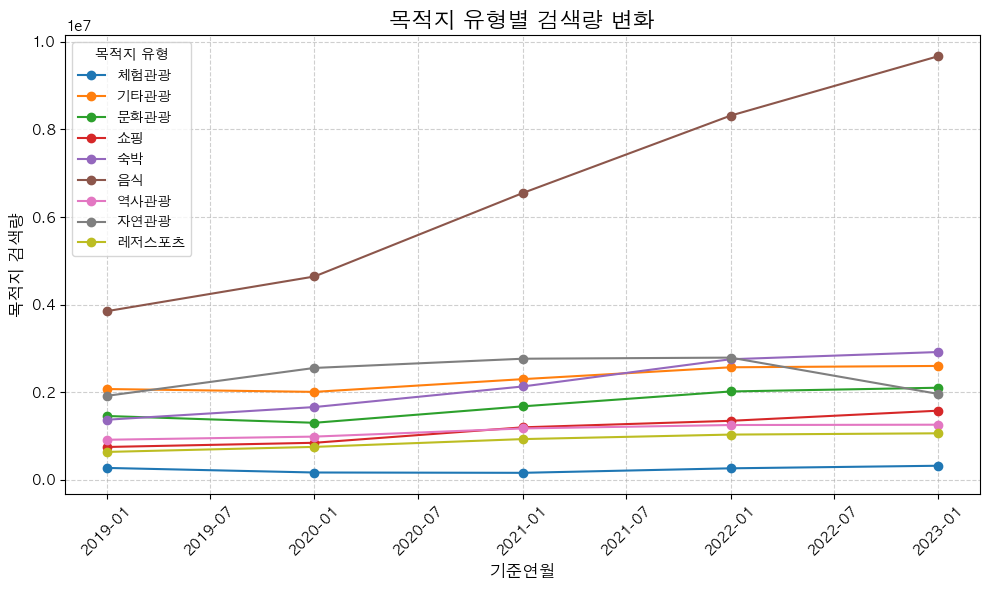

In [2]:
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')


# 각 '목적지 유형'별로 선그래프 그리기
plt.figure(figsize=(10, 6))

for category in df['목적지 유형'].unique():
    filtered_data = df[df['목적지 유형'] == category]
    plt.plot(filtered_data['기준연월'], filtered_data['목적지 검색량'], marker='o', label=category)

# 그래프 꾸미기
plt.title('목적지 유형별 검색량 변화', fontsize=16)
plt.xlabel('기준연월', fontsize=12)
plt.ylabel('목적지 검색량', fontsize=12)
plt.legend(title='목적지 유형', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# x축 날짜 포맷 조정 (optional)
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()



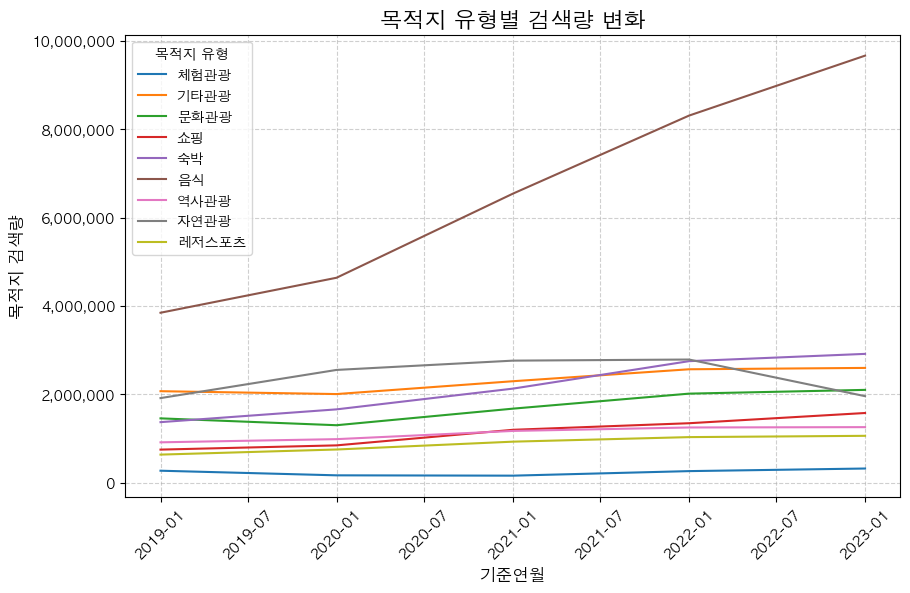

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# 데이터 로드
df = pd.read_csv('20240822000558_목적지 유형별 검색량.csv', encoding='cp949')
df.drop(index=df.index[0:5], inplace=True)  # 첫 5개의 행 제거

# '기준연월'을 datetime 형식으로 변환
df['기준연월'] = pd.to_datetime(df['기준연월'], format='%Y', errors='coerce')

# '기준연월' 오름차순 정렬
df = df.sort_values(by='기준연월')

# 각 '목적지 유형'에 대해 선그래프 생성
plt.figure(figsize=(10, 6))
for 유형 in df['목적지 유형'].unique():
    subset = df[df['목적지 유형'] == 유형]
    plt.plot(subset['기준연월'], subset['목적지 검색량'], label=유형)

# y축 숫자를 일반적인 형식으로 표시
plt.gca().get_yaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=False))
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# 그래프 꾸미기
plt.title('목적지 유형별 검색량 변화', fontsize=16)
plt.xlabel('기준연월', fontsize=12)
plt.ylabel('목적지 검색량', fontsize=12)
plt.legend(title='목적지 유형', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# x축 날짜 포맷 조정 (optional)
plt.xticks(rotation=45)

# 그래프 출력
plt.show()
